<br>
<br>
<br>

<center><span style="font-size:60pt;color:blue">Linked Data Programming with Python<hr></span></center>
<h1>réalisé par:</h1>
<ul style="font-size:20pt;color:orange;background:black">
    <li>SAMEH Oussama</li>
    
</ul>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<h1 style="font-size:60pt;color:blue">Plan</h1>

<ul style="font-size:30pt;color:blue">

    - Introduction au Linked Data
    - Introduction au RDF Graphs dans Python
    - Application

</ul>

<center><h1 style="font-size:40pt;color:blue">Introduction au Linked Data</h1></center>


<p style="font-size:20pt">
The Semantic Web isn't just about putting data on the web. It is about making links, so that a person or machine can explore the web of data.  With linked data, when you have some of it, you can find other, related, data.</p>

<p style="font-size:20pt">
Like the web of hypertext, the web of data is constructed with documents on the web. However,  unlike the web of hypertext,  where links are relationships anchors in hypertext documents written in HTML, for data they links  between arbitrary things described by RDF,.  The URIs identify any kind of object or  concept.   But for HTML or RDF, the same expectations apply to make the web grow:
</p>

<div style="font-size:20pt;font-weight:bold">
    
- Use URIs as names for things

- Use HTTP URIs so that people can look up those names.

- When someone looks up a URI, provide useful information.

- Include links to other URIs. so that they can discover more things.

</div>

                                                                                                                     Tim Berners-Lee

<center><img src="https://ontology2.com/notebooks/local/img/what-it-represents.png"></center>


<center><h1 style="font-size:40pt;color:blue">Recherche des hotels validant des critères spéciaux</h1></center>


<center><img src="WebShema.png"></center>

<center><h1 style="font-size:40pt;color:blue">Example démonstratif</h1></center>
<br>
<br>

# Sur le moteur de recherche

In [23]:
Places = Graph()
Places.parse('places.rdf')

q = """
SELECT ?p (COUNT(?p) as ?num)
WHERE {
    ?s rdf:type ?p
} GROUP BY ?p

"""

res = Places.query(q)
for r in res:
    print(r.p,"    ","\t",r.num)

http://www.exemple.com/object#Cinema      	 500
http://www.exemple.com/object#Hotel      	 2000
http://www.exemple.com/object#Bank      	 500
http://www.exemple.com/object#Casino      	 500
http://www.exemple.com/object#Restaurant      	 500
http://www.exemple.com/object#School      	 500
http://www.exemple.com/object#Store      	 500
http://www.exemple.com/object#Coffee      	 500


In [24]:
q = """
SELECT ?hoteluri
WHERE {
    ?hoteluri rdf:type <http://www.exemple.com/object#Hotel>
}

"""

listeURIsHotels = Places.query(q)

<br>
<br>
<br>

# Sur les Hotels

In [7]:
Hotels = Graph()
Hotels.bind('voc',"http://www.exemple.com/vocabilaire/")
Hotels.bind('obj',"http://www.exemple.com/object#")
for r in listeURIsHotels:
    g = Graph()
    g.parse(str(r.hoteluri))
    Hotels += g

In [8]:
q = """
SELECT DISTINCT ?hname ?huri ?tel ?ad
WHERE {
    ?huri rdf:type obj:Hotel.
    ?huri voc:name ?hname.
    ?huri voc:location "Fes".
    ?huri voc:has  ?ruri.
    ?ruri voc:hasChambre 2.
    ?huri voc:star 5.
    OPTIONAL {?huri voc:tel ?tel}.
    OPTIONAL {?huri voc:adress ?ad}
} LIMIT 20

"""

res = Hotels.query(q)
for r in res:
    print("Hotel: ",r.hname,r.huri,"Tel:",r.tel,"Adress: ",r.ad)

Hotel:  JRXMFCMMNP http://www.JRXMFCMMNP.com/db.rdf Tel: None Adress:  None
Hotel:  GEEKKXBULE http://www.GEEKKXBULE.com/db.rdf Tel: 0690360540 Adress:  None
Hotel:  FSNAESWXZV http://www.FSNAESWXZV.com/db.rdf Tel: 0656514320 Adress:  None
Hotel:  ONFVABRQBK http://www.ONFVABRQBK.com/db.rdf Tel: 0684785687 Adress:  RUE PKBFT, Fes
Hotel:  GVDTYCDPQS http://www.GVDTYCDPQS.com/db.rdf Tel: 0669388153 Adress:  RUE VIJCO, Fes
Hotel:  EHANJCMLTL http://www.EHANJCMLTL.com/db.rdf Tel: None Adress:  RUE DAKEQ, Fes
Hotel:  XQWPZJUZLX http://www.XQWPZJUZLX.com/db.rdf Tel: None Adress:  None
Hotel:  LQTLRQNDDN http://www.LQTLRQNDDN.com/db.rdf Tel: None Adress:  None
Hotel:  SOBMKOXLFO http://www.SOBMKOXLFO.com/db.rdf Tel: None Adress:  None
Hotel:  FBXZUBYOVS http://www.FBXZUBYOVS.com/db.rdf Tel: None Adress:  None
Hotel:  EPWVLLJEAU http://www.EPWVLLJEAU.com/db.rdf Tel: None Adress:  None
Hotel:  MPHGXUDMTY http://www.MPHGXUDMTY.com/db.rdf Tel: 0634565550 Adress:  None
Hotel:  LWIFOUGWFC http://ww

<center><h1 style="font-size:40pt;color:blue">Introduction au RDF Graphs dans Python</h1></center>

<center><h1 style="font-size:40pt;color:red">rdflib, owlrl</h1></center>

<hr>
<div style="font-size:20pt;font-weight:bold">

- Créer une base de faits sous forme d'un graph 
- Lire une base de faits (locale ou remote)
- Sérialisation en plusieurs format 
- Exécuter des requetes sparql
- Appliquer les règles d'inférences 
</div>

# Simple Triple

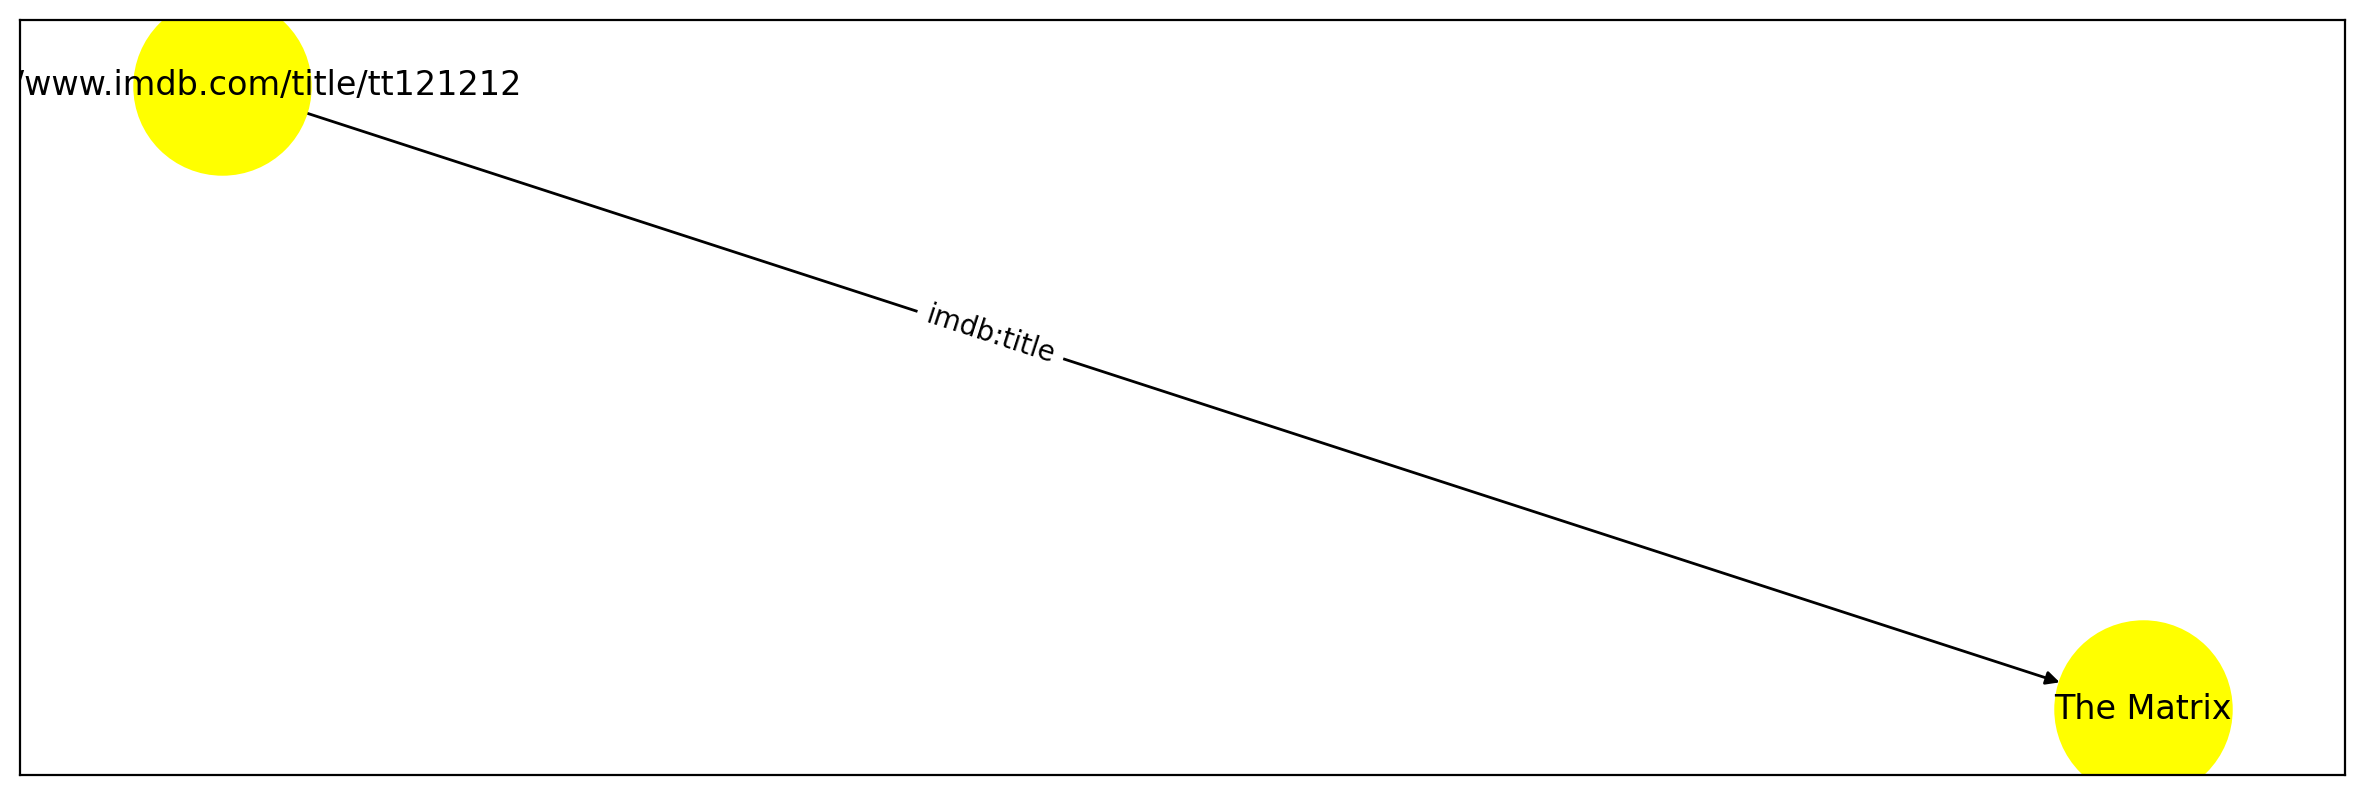

In [123]:
show(movies)

In [14]:
movies = Graph()

#definir le namespace de IMBD
IMDB = Namespace("http://www.csd.abdn.ac.uk/~ggrimnes/dev/imdb/IMDB#")
movies.bind("imdb", IMDB)

#ecrire les ressources ou les literaux
Subject  = URIRef("http://www.imdb.com/title/tt121212")
Predicat = IMDB.title
Object   = Literal("The Matrix")

#ajouter le triple
movies.add((Subject,Predicat,Object))


print(movies.serialize(format="xml"))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:imdb="http://www.csd.abdn.ac.uk/~ggrimnes/dev/imdb/IMDB#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://www.imdb.com/title/tt121212">
    <imdb:title>The Matrix</imdb:title>
  </rdf:Description>
</rdf:RDF>



In [71]:
print(movies.serialize(format="n3"))

@prefix imdb: <http://www.csd.abdn.ac.uk/~ggrimnes/dev/imdb/IMDB#> .

<http://www.imdb.com/title/tt121212> imdb:title "The Matrix" .




In [73]:
print(movies.serialize(format="json-ld"))

[
  {
    "@id": "http://www.imdb.com/title/tt121212",
    "http://www.csd.abdn.ac.uk/~ggrimnes/dev/imdb/IMDB#title": [
      {
        "@value": "The Matrix"
      }
    ]
  }
]


<br>
<br>
<br>

<br>
<br>
<br>

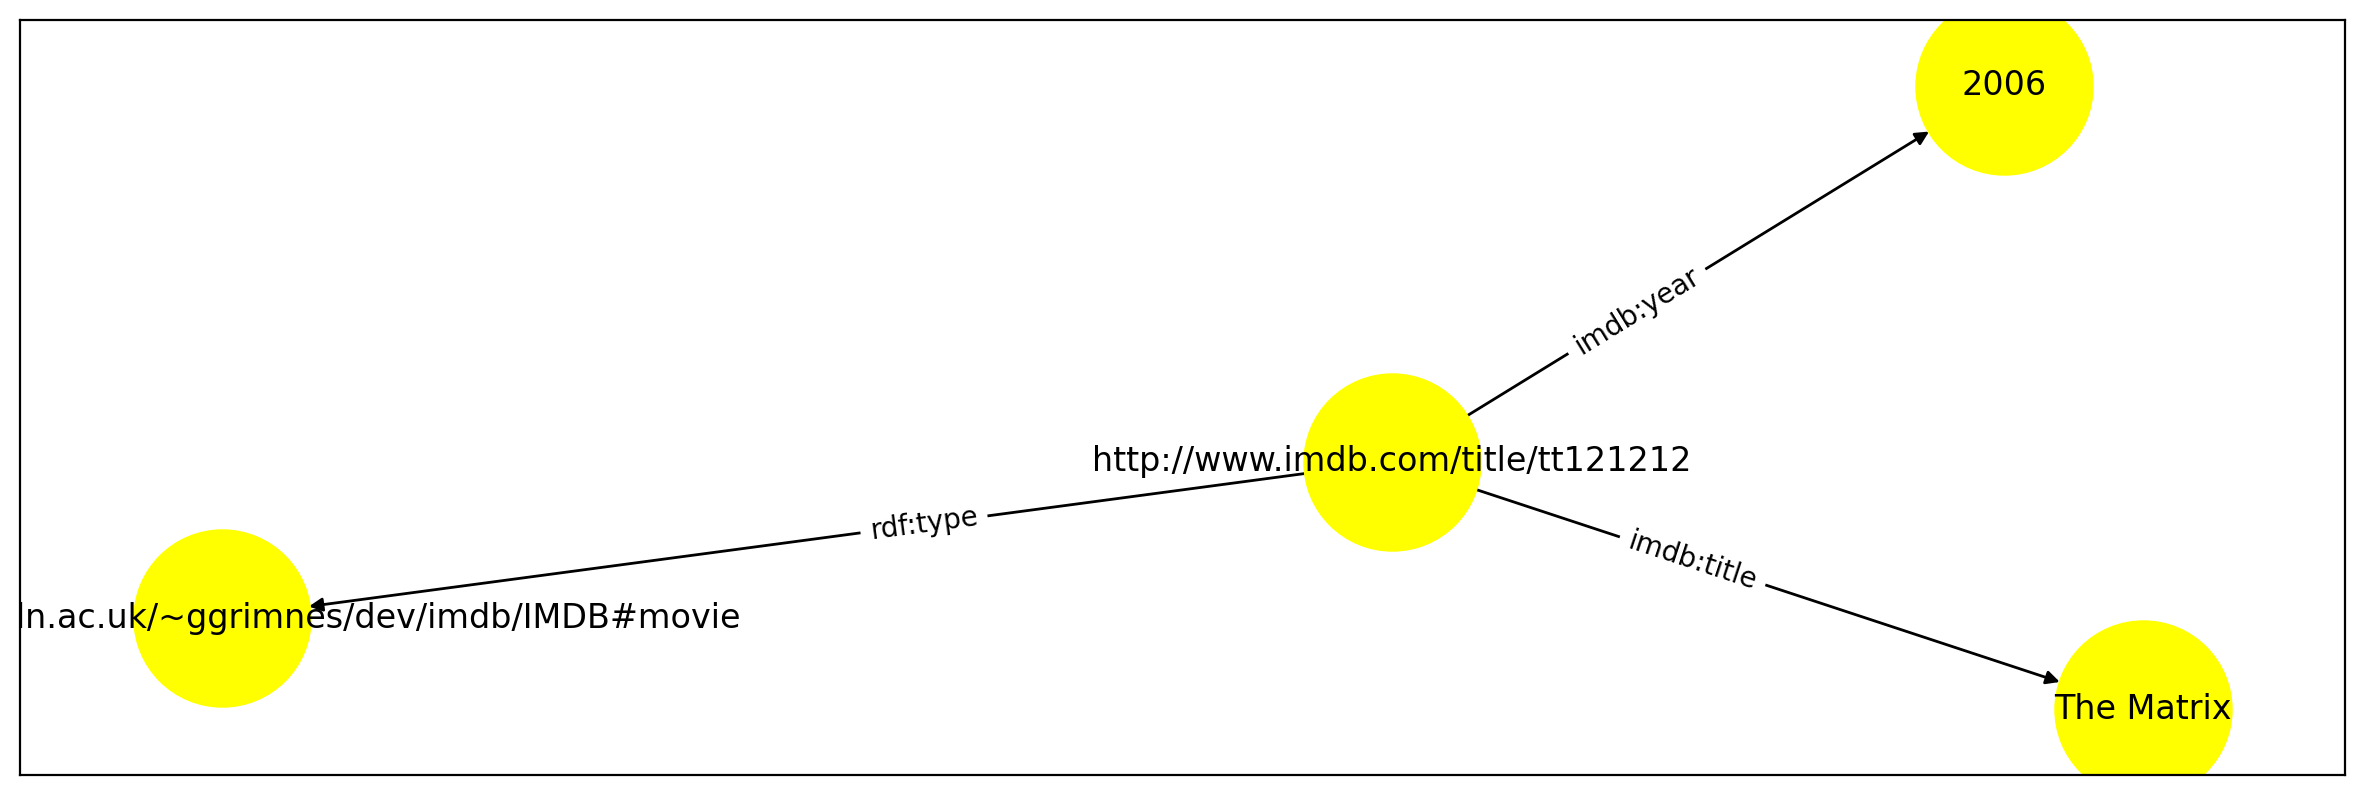

In [128]:
show(movies)

In [15]:
movies = Graph()
#definir le namespace de IMBD
movies.bind("imdb", IMDB)

S = URIRef("http://www.imdb.com/title/tt121212")

#ajouter les triples
movies.add((S,IMDB.title,Literal("The Matrix")))
movies.add((S, IMDB['year'], Literal("2006")))
movies.add((S,RDF.type, IMDB["movie"]))


print(movies.serialize(format="xml"))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:imdb="http://www.csd.abdn.ac.uk/~ggrimnes/dev/imdb/IMDB#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://www.imdb.com/title/tt121212">
    <imdb:title>The Matrix</imdb:title>
    <imdb:year>2006</imdb:year>
    <rdf:type rdf:resource="http://www.csd.abdn.ac.uk/~ggrimnes/dev/imdb/IMDB#movie"/>
  </rdf:Description>
</rdf:RDF>



<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

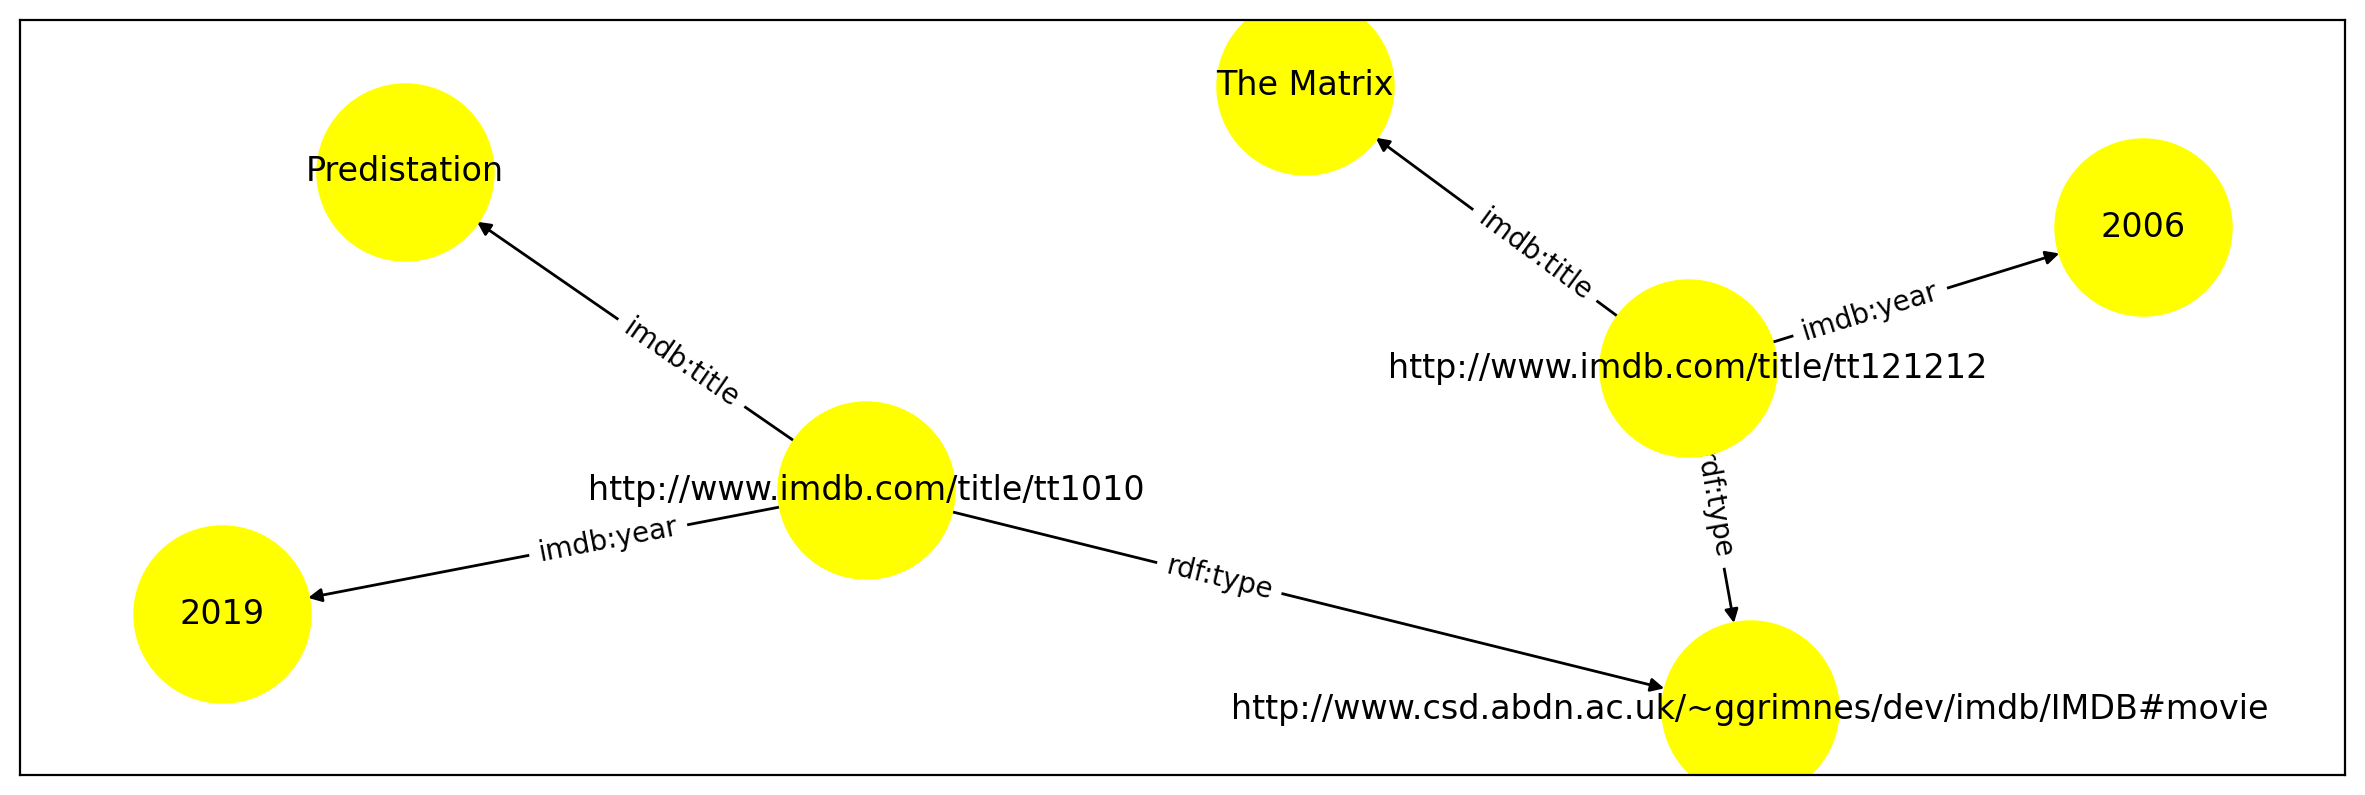

In [139]:
show(movies)

<br>
<br>
<br>

<br>
<br>
<br>

In [77]:
movies = Graph()
#definir le namespace de IMBD
movies.bind("imdb", IMDB)


#ajouter les triples
movies.add((URIRef("http://www.imdb.com/title/tt121212"),IMDB.title,Literal("The Matrix")))
movies.add((URIRef("http://www.imdb.com/title/tt121212"), IMDB['year'], Literal("2006")))
movies.add((URIRef("http://www.imdb.com/title/tt121212"),RDF.type, IMDB["movie"]))

movies.add((URIRef("http://www.imdb.com/title/tt1010"),IMDB.title,Literal("Predistation")))
movies.add((URIRef("http://www.imdb.com/title/tt1010"), IMDB['year'], Literal("2019")))
movies.add((URIRef("http://www.imdb.com/title/tt1010"),RDF.type, IMDB["movie"]))
print(movies.serialize(format="xml"))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:imdb="http://www.csd.abdn.ac.uk/~ggrimnes/dev/imdb/IMDB#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://www.imdb.com/title/tt1010">
    <imdb:title>Predistation</imdb:title>
    <imdb:year>2019</imdb:year>
    <rdf:type rdf:resource="http://www.csd.abdn.ac.uk/~ggrimnes/dev/imdb/IMDB#movie"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://www.imdb.com/title/tt121212">
    <imdb:title>The Matrix</imdb:title>
    <imdb:year>2006</imdb:year>
    <rdf:type rdf:resource="http://www.csd.abdn.ac.uk/~ggrimnes/dev/imdb/IMDB#movie"/>
  </rdf:Description>
</rdf:RDF>



In [78]:
print(movies.serialize(format="n3"))

@prefix imdb: <http://www.csd.abdn.ac.uk/~ggrimnes/dev/imdb/IMDB#> .

<http://www.imdb.com/title/tt1010> a imdb:movie ;
    imdb:title "Predistation" ;
    imdb:year "2019" .

<http://www.imdb.com/title/tt121212> a imdb:movie ;
    imdb:title "The Matrix" ;
    imdb:year "2006" .




<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

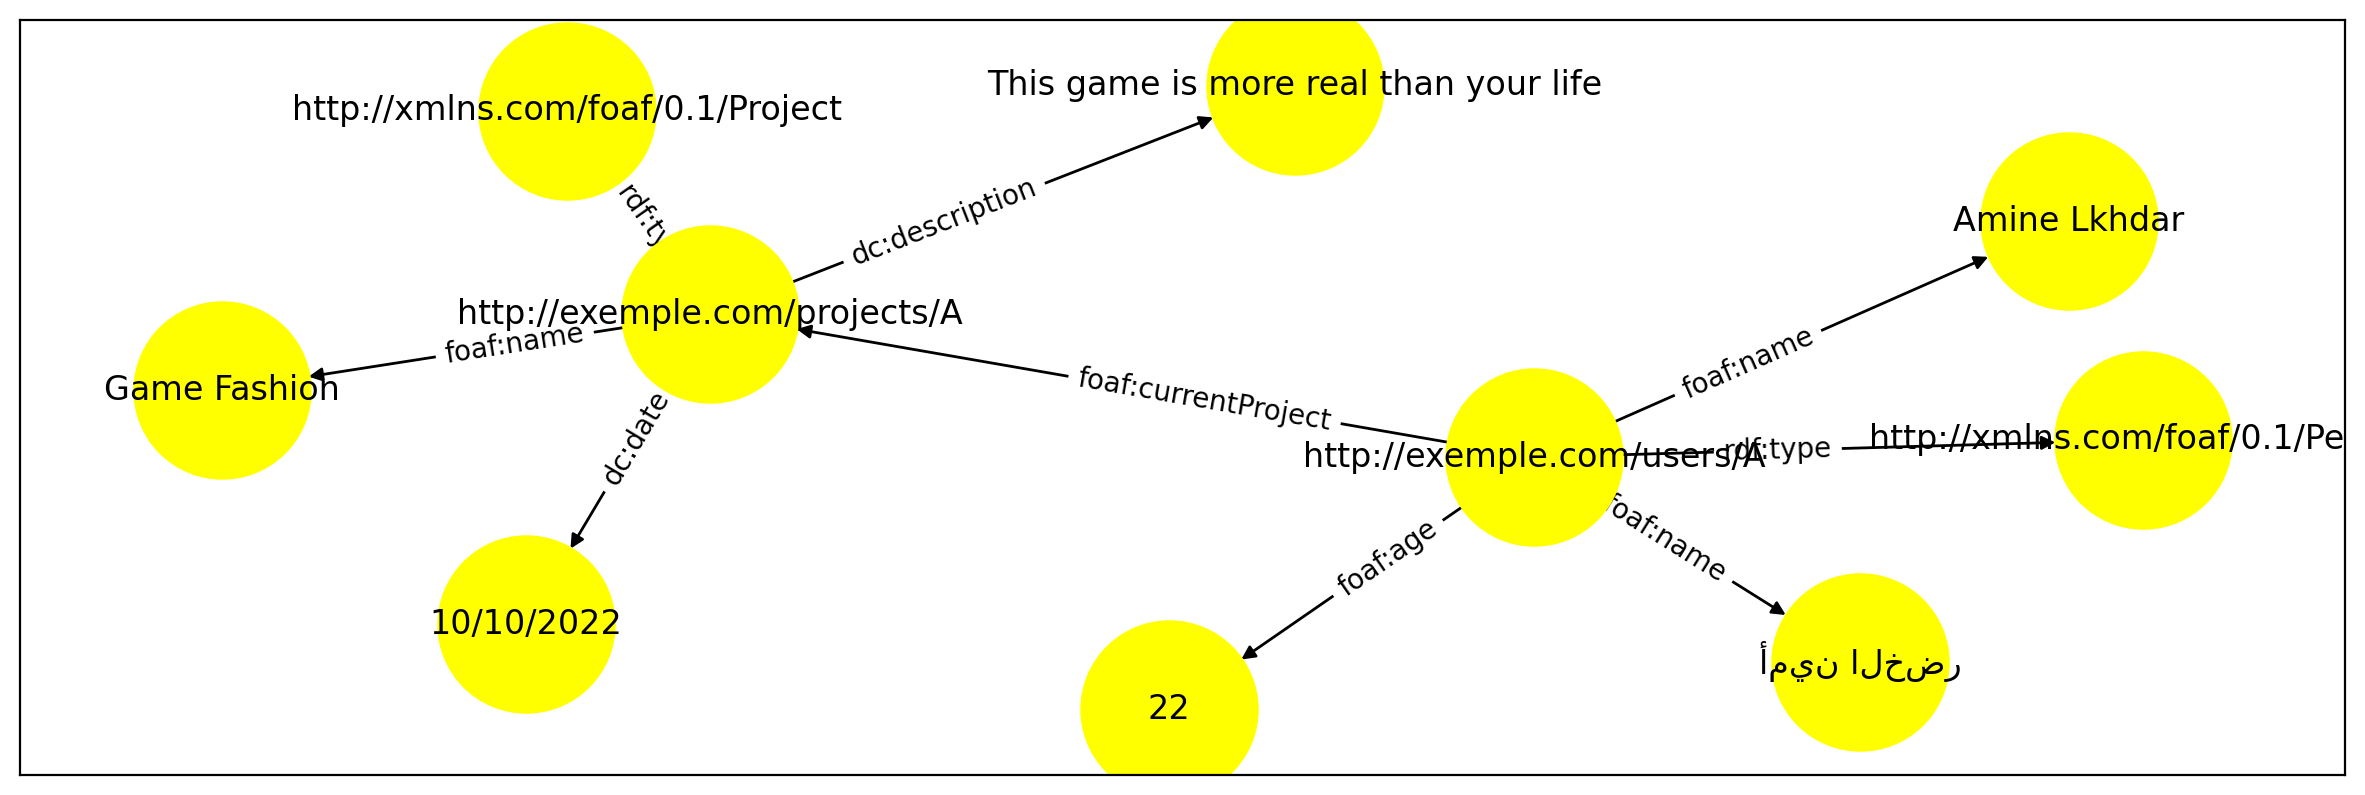

In [240]:
show(g)

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

In [241]:
g = Graph()
g.bind('foaf',FOAF)
g.bind('dc',DC)

g.add((URIRef("http://exemple.com/users/A"),RDF.type,FOAF.Person))
g.add((URIRef("http://exemple.com/users/A"),FOAF.name,Literal("Amine Lkhdar",lang='FR')))
g.add((URIRef("http://exemple.com/users/A"),FOAF.name,Literal("أمين الخضر",lang='AR')))
g.add((URIRef("http://exemple.com/users/A"),FOAF.age,Literal(22)))
g.add((URIRef("http://exemple.com/users/A"),FOAF.currentProject,URIRef("http://exemple.com/projects/A")))

g.add((URIRef("http://exemple.com/projects/A"),RDF.type,FOAF.Project))
g.add((URIRef("http://exemple.com/projects/A"),FOAF.name,Literal("Game Fashion")))
g.add((URIRef("http://exemple.com/projects/A"),DC.date,Literal("10/10/2022")))
g.add((URIRef("http://exemple.com/projects/A"),DC.description,Literal("This game is more real than your life")))

      
print(g.serialize(format="xml"))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:foaf="http://xmlns.com/foaf/0.1/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://exemple.com/projects/A">
    <rdf:type rdf:resource="http://xmlns.com/foaf/0.1/Project"/>
    <foaf:name>Game Fashion</foaf:name>
    <dc:date>10/10/2022</dc:date>
    <dc:description>This game is more real than your life</dc:description>
  </rdf:Description>
  <rdf:Description rdf:about="http://exemple.com/users/A">
    <rdf:type rdf:resource="http://xmlns.com/foaf/0.1/Person"/>
    <foaf:name xml:lang="FR">Amine Lkhdar</foaf:name>
    <foaf:name xml:lang="AR">أمين الخضر</foaf:name>
    <foaf:age rdf:datatype="http://www.w3.org/2001/XMLSchema#integer">22</foaf:age>
    <foaf:currentProject rdf:resource="http://exemple.com/projects/A"/>
  </rdf:Description>
</rdf:RDF>



<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

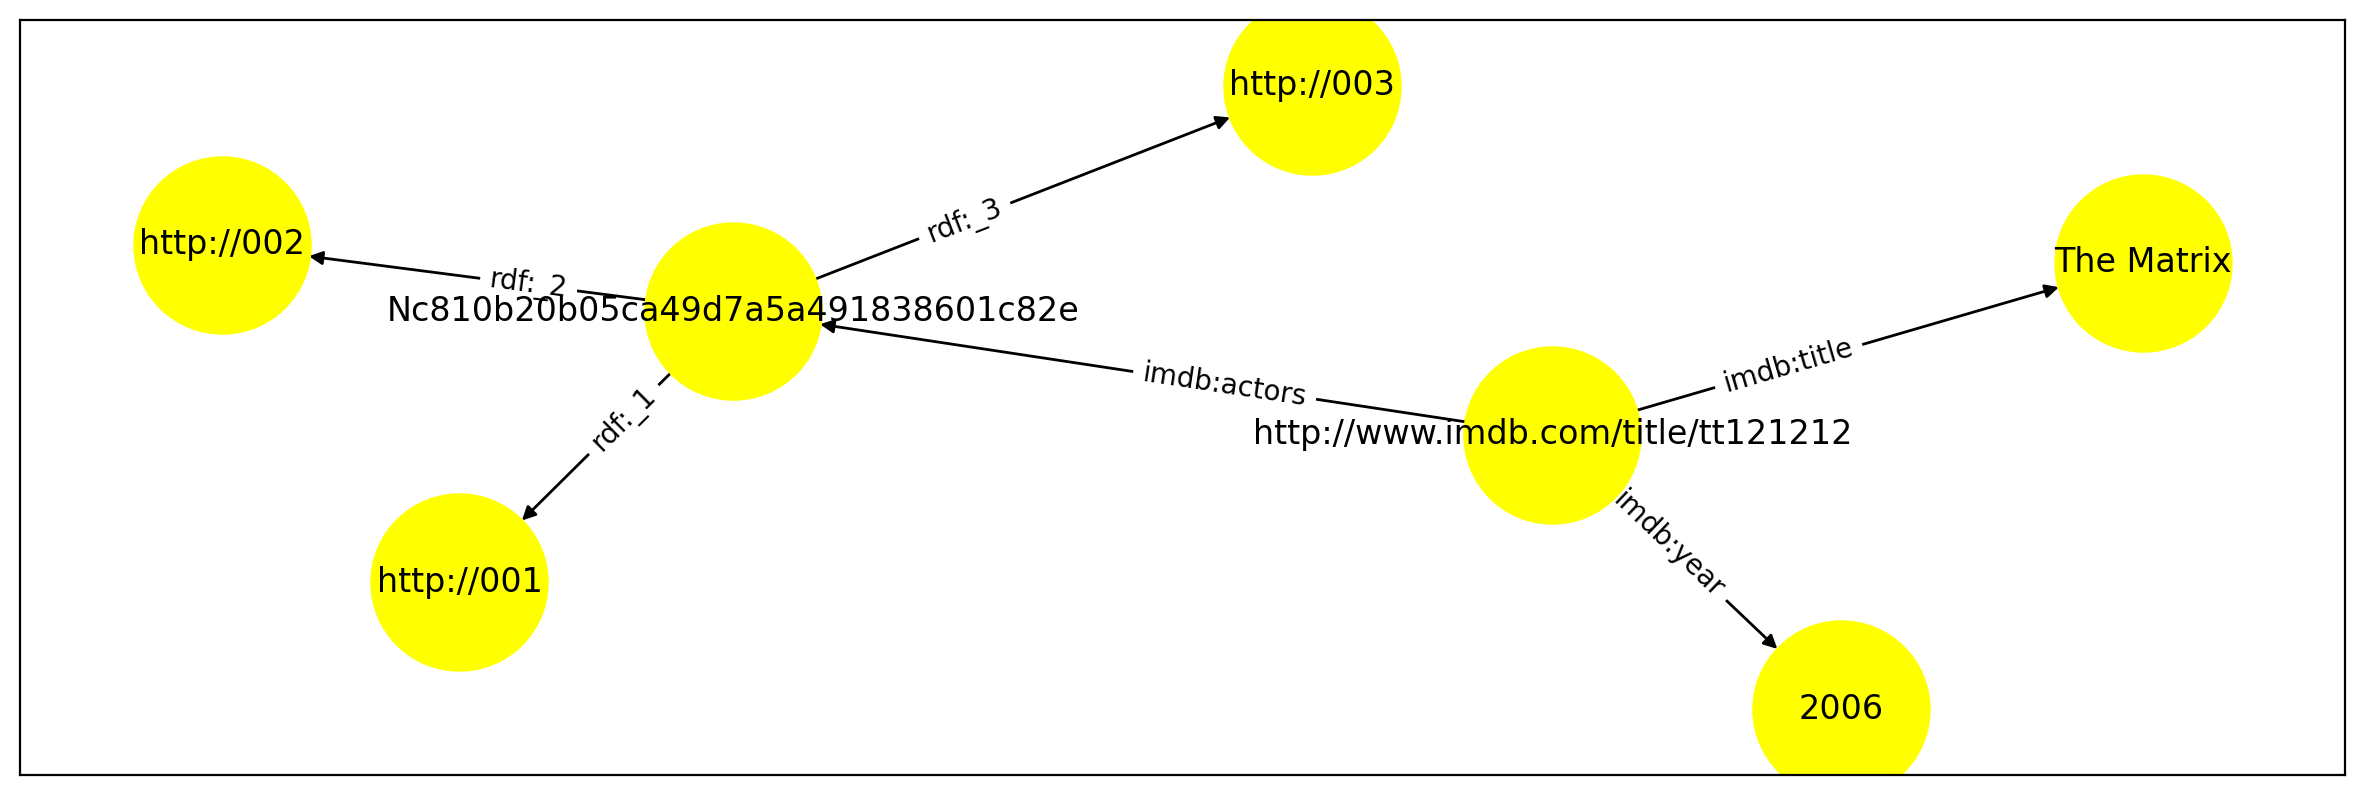

In [186]:
show(movies)

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

In [220]:
movies = Graph()
#definir le namespace de IMBD
movies.bind("imdb", IMDB)


#ajouter les triples
movies.add((URIRef("http://www.imdb.com/title/tt121212"),IMDB.title,Literal("The Matrix")))
movies.add((URIRef("http://www.imdb.com/title/tt121212"), IMDB['year'], Literal("2006")))

seq = BNode()
movies.add((seq, RDF.type, RDF.Seq))
movies.add((URIRef("http://www.imdb.com/title/tt121212"),IMDB.actors, seq))

movies.add((seq, RDF._1, URIRef("http://001")))
movies.add((seq, RDF._2, URIRef("http://002")))
movies.add((seq, RDF._3, URIRef("http://003")))


print(movies.serialize(format="xml"))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:imdb="http://www.csd.abdn.ac.uk/~ggrimnes/dev/imdb/IMDB#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:nodeID="Nc433f04e713b4191a8e8bfd7a4eb5f17">
    <rdf:type rdf:resource="http://www.w3.org/1999/02/22-rdf-syntax-ns#Seq"/>
    <rdf:_1 rdf:resource="http://001"/>
    <rdf:_2 rdf:resource="http://002"/>
    <rdf:_3 rdf:resource="http://003"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://www.imdb.com/title/tt121212">
    <imdb:title>The Matrix</imdb:title>
    <imdb:year>2006</imdb:year>
    <imdb:actors rdf:nodeID="Nc433f04e713b4191a8e8bfd7a4eb5f17"/>
  </rdf:Description>
</rdf:RDF>



<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

# SPARQL

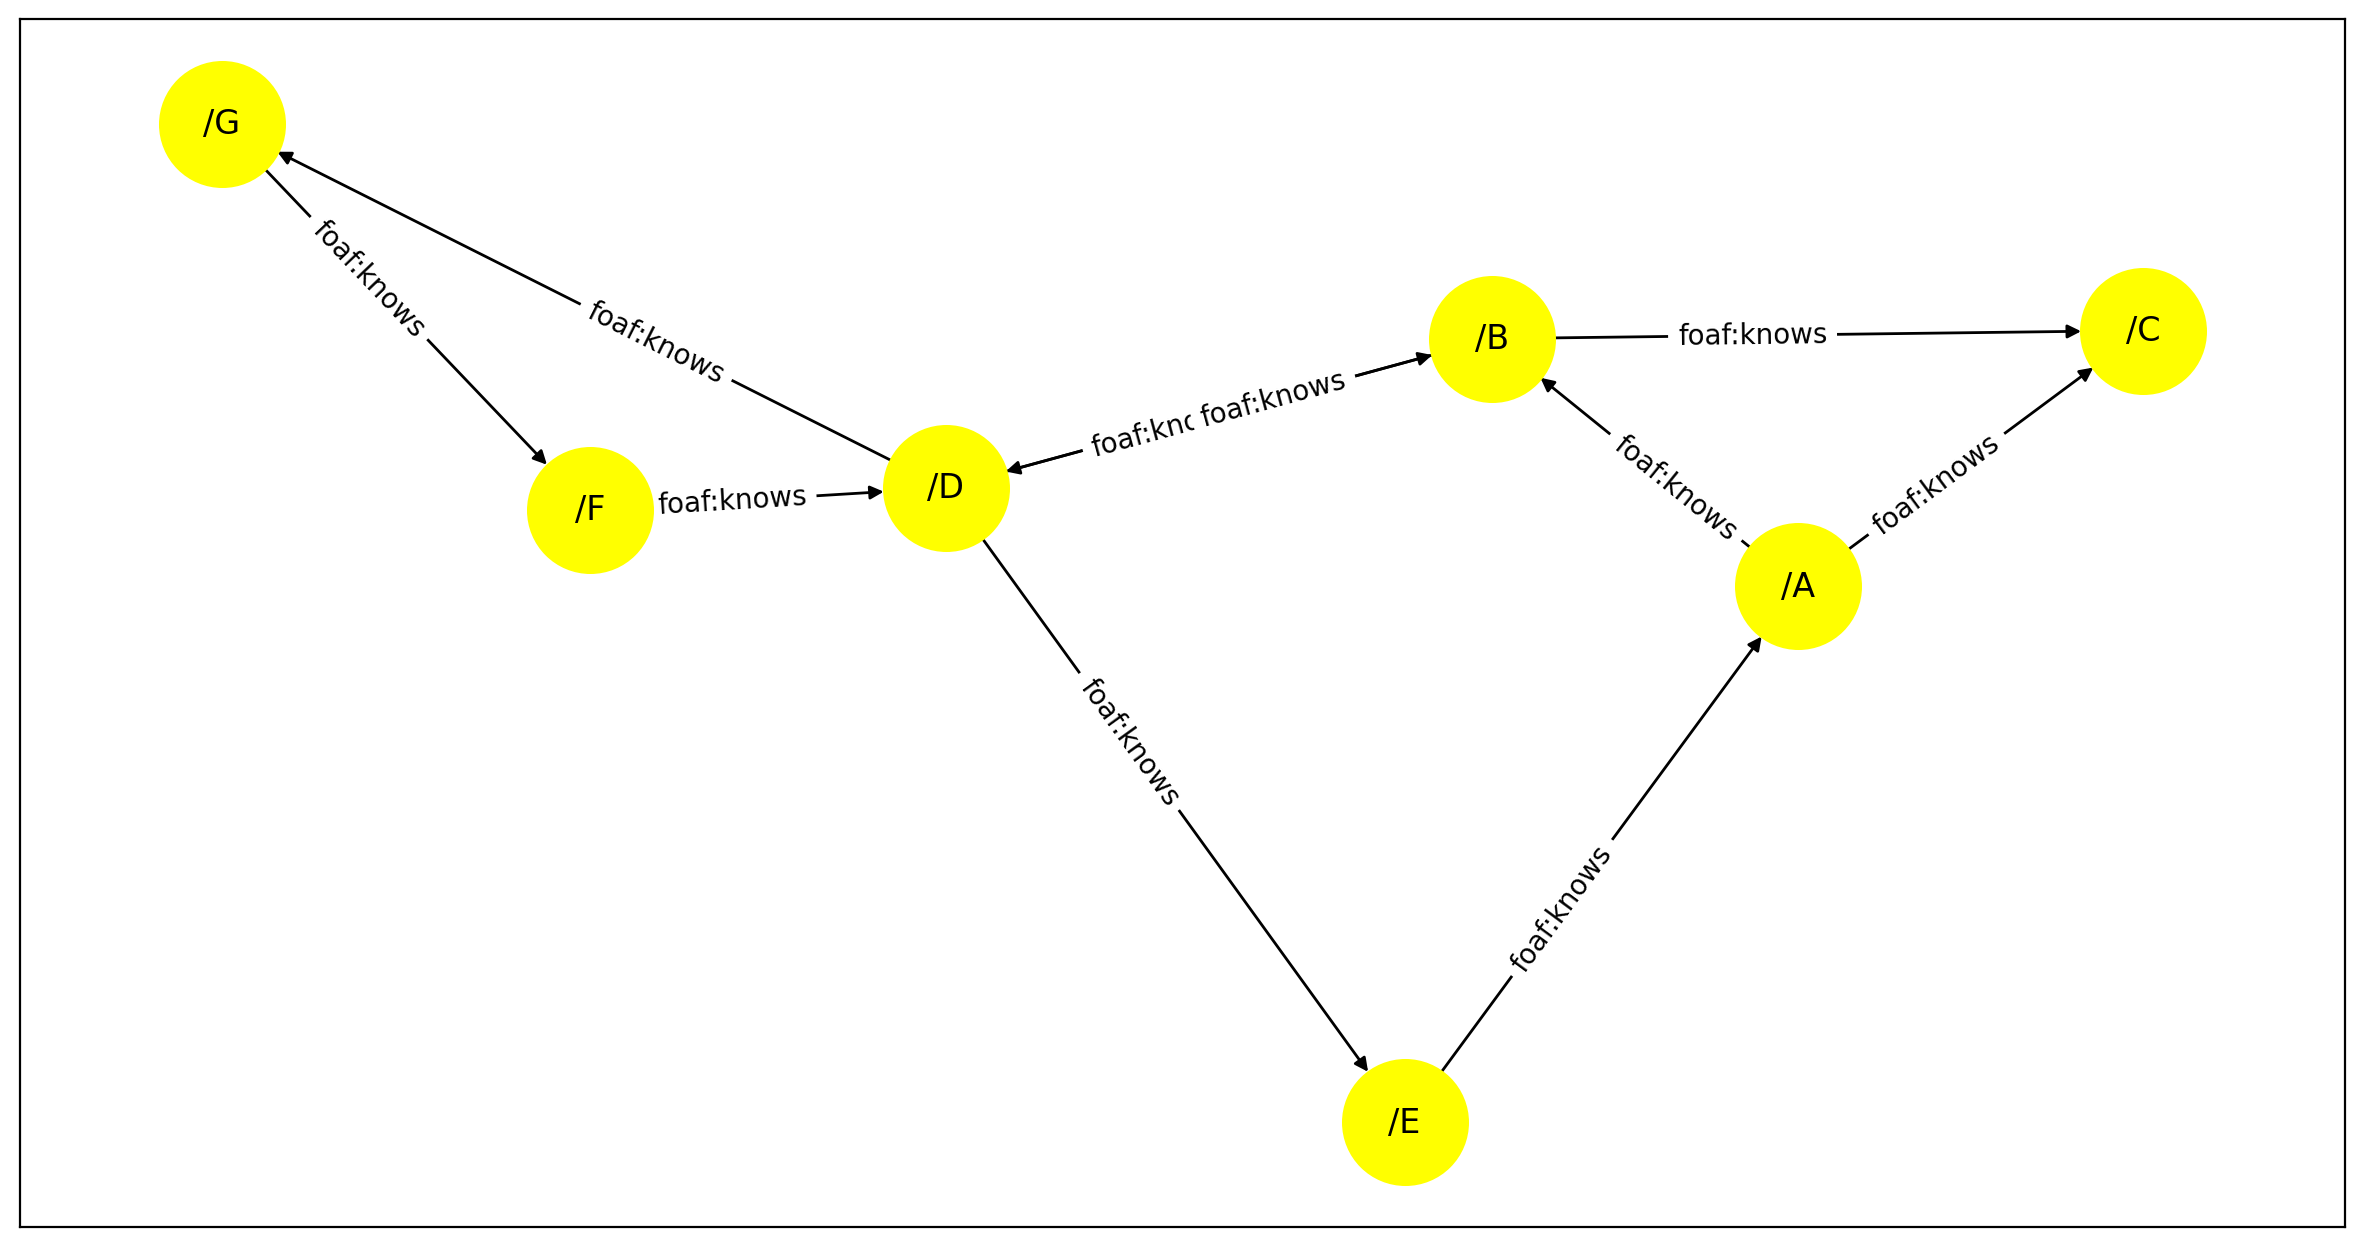

In [312]:
show(g)

In [331]:
g = Graph()
g.bind('foaf',FOAF)

g.add((URIRef("/A"),FOAF.name,Literal("Amine")))
g.add((URIRef("/B"),FOAF.name,Literal("Badre")))
g.add((URIRef("/C"),FOAF.name,Literal("Chama")))
g.add((URIRef("/D"),FOAF.name,Literal("Dounia")))
g.add((URIRef("/E"),FOAF.name,Literal("Elbachir")))
g.add((URIRef("/F"),FOAF.name,Literal("Fatima")))
g.add((URIRef("/G"),FOAF.name,Literal("Gamal")))


g.add((URIRef("/A"),FOAF.knows,URIRef("/B")))
g.add((URIRef("/A"),FOAF.knows,URIRef("/C")))
g.add((URIRef("/B"),FOAF.knows,URIRef("/C")))
g.add((URIRef("/B"),FOAF.knows,URIRef("/D")))
g.add((URIRef("/D"),FOAF.knows,URIRef("/E")))
g.add((URIRef("/D"),FOAF.knows,URIRef("/B")))
g.add((URIRef("/D"),FOAF.knows,URIRef("/G")))
g.add((URIRef("/E"),FOAF.knows,URIRef("/A")))
g.add((URIRef("/F"),FOAF.knows,URIRef("/D")))
g.add((URIRef("/G"),FOAF.knows,URIRef("/F")))
      
print(g.serialize(format="n3"))

@prefix foaf: <http://xmlns.com/foaf/0.1/> .

</A> foaf:knows </B>,
        </C> ;
    foaf:name "Amine" .

</E> foaf:knows </A> ;
    foaf:name "Elbachir" .

</F> foaf:knows </D> ;
    foaf:name "Fatima" .

</G> foaf:knows </F> ;
    foaf:name "Gamal" .

</B> foaf:knows </C>,
        </D> ;
    foaf:name "Badre" .

</C> foaf:name "Chama" .

</D> foaf:knows </B>,
        </E>,
        </G> ;
    foaf:name "Dounia" .




<br>
<br>
<br>

In [332]:
query = """
SELECT ?name
WHERE {
    </A> foaf:knows ?p.
    ?p foaf:name ?name
}"""
res = g.query(query)
for r in res:
    print(r.name)

Badre
Chama


<br>
<br>
<br>

In [333]:
query = """
SELECT ?xname ?yname
WHERE {
    ?x foaf:knows ?y.
    ?x foaf:name ?xname.
    ?y foaf:name ?yname
}"""
res = g.query(query)
for r in res:
    print(r.xname," knows ",r.yname)

Amine  knows  Badre
Dounia  knows  Badre
Amine  knows  Chama
Badre  knows  Chama
Badre  knows  Dounia
Fatima  knows  Dounia
Dounia  knows  Elbachir
Dounia  knows  Gamal
Elbachir  knows  Amine
Gamal  knows  Fatima


<br>
<br>
<br>

In [336]:
query = """
SELECT ?xname ?yname ?zname
WHERE {
    ?x foaf:knows ?z.
    ?y foaf:knows ?z.
    ?x foaf:knows ?y.
    ?x foaf:name ?xname.
    ?y foaf:name ?yname.
    ?z foaf:name ?zname
}"""
res = g.query(query)
for r in res:
    print(r.xname," knows ",r.yname, "\nthey know", r.zname)

Amine  knows  Badre 
they know Chama


<br>
<br>
<br>

<br>
<br>
<br>

# Moteur d'inférences

In [ ]:
VOC  = Namespace("http://www.exemple.com/voc/")
RDFS = Namespace("http://www.w3.org/2000/01/rdf-schema#")

def subGraph(graph,subject):
    g =  Graph()
    g += graph.triples((subject,None,None))
    return g

def inference(g):
    owl = owlrl.CombinedClosure.RDFS_OWLRL_Semantics(g, False, False, False)
    owl.closure()
    owl.flush_stored_triples()

<br>
<br>
<br>

In [ ]:
G = Graph()
G.bind("voc",VOC)
G.bind("rdfs",RDFS)

G.add((VOC.A,RDF.type,VOC.B))
G.add((VOC.B,RDFS.subClassOf,VOC.C))

print(G.serialize(format="xml"))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
>
  <rdf:Description rdf:about="http://www.exemple.com/voc/A">
    <rdf:type rdf:resource="http://www.exemple.com/voc/B"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://www.exemple.com/voc/B">
    <rdfs:subClassOf rdf:resource="http://www.exemple.com/voc/C"/>
  </rdf:Description>
</rdf:RDF>



<br>
<br>
<br>

In [ ]:
inference(G)
A = subGraph(G,VOC.A)

print(A.serialize(format="xml"))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:owl="http://www.w3.org/2002/07/owl#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://www.exemple.com/voc/A">
    <rdf:type rdf:resource="http://www.exemple.com/voc/B"/>
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Resource"/>
    <rdf:type rdf:resource="http://www.exemple.com/voc/C"/>
    <rdf:type rdf:resource="http://www.w3.org/2002/07/owl#Thing"/>
    <owl:sameAs rdf:resource="http://www.exemple.com/voc/A"/>
  </rdf:Description>
</rdf:RDF>



<br>
<br>
<br>

In [ ]:
G.add((VOC.has,RDFS.range,VOC.B))
G.add((VOC.X,VOC.has,VOC.Y))

print(subGraph(G,VOC.Y).serialize(format="xml"))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
</rdf:RDF>



<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

In [ ]:
inference(G)
print(subGraph(G,VOC.Y).serialize(format="xml"))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:owl="http://www.w3.org/2002/07/owl#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://www.exemple.com/voc/Y">
    <rdf:type rdf:resource="http://www.exemple.com/voc/B"/>
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Resource"/>
    <rdf:type rdf:resource="http://www.exemple.com/voc/C"/>
    <rdf:type rdf:resource="http://www.w3.org/2002/07/owl#Thing"/>
    <owl:sameAs rdf:resource="http://www.exemple.com/voc/Y"/>
  </rdf:Description>
</rdf:RDF>



<center><h1 style="font-size:40pt;color:blue">Application</h1></center>


<center><img src="WebMDBI.png"></center>

# Implémentation

In [26]:
from lxml import html
import requests
import re
import xml.etree.ElementTree as ET
from xml.dom import minidom
from xml.etree.ElementTree import ElementTree
from rdflib import Graph, Literal, RDF, URIRef, Namespace, BNode, Bag

In [27]:
moviesListPage = requests.get("https://www.imdb.com/chart/top/?ref_=nv_mv_250")
xml = html.fromstring(moviesListPage.content)
links = xml.xpath("//a[@title]/@href")
print(len(links),"Links are found")

255 Links are found


In [28]:
movies = []
for l in links:
    if re.findall("^/title/tt[0-9]*/$", l):
        code = l[7:-1]
        if code not in movies:
            movies.append(code)

print(len(movies),"movies are found")

250 movies are found


In [36]:
def value_to_int(x):
    if 'K' in x:
        if len(x) > 1:
            return int(float(x.replace('K', '')) * 1000)
        return 1000
    if 'M' in x:
        if len(x) > 1:
            return int(float(x.replace('M', '')) * 1000000)
        return 1000000
    if 'B' in x:
        return int(float(x.replace('B', '')) * 1000000000)
    return x

def movie_info(m,maxa=25,mins=1,maxr=25):
    page = requests.get("https://www.imdb.com/title/" + m)
    root = html.fromstring(page.content)
    
    if len(root.xpath("/html/head/title[text() = '404 Error - IMDb']")) == 1:
        return False
    
    movie = ET.Element('movie')
    movie.set('code','https://www.imdb.com/title/' + m)
    movie.set('type','Movie')
    
    try:
        data  = root.xpath("//h1[@data-testid='hero-title-block__title']/text()")[0]
        title = ET.SubElement(movie,'title')
        title.set('type','text')
        title.text = data
    except:
        pass
    
    try:
        data = root.xpath("//span[@data-testid = 'plot-l']/text()")[0]
        plot = ET.SubElement(movie,'plot')
        plot.set('type','text')
        plot.text = data
    except:
        pass
    
    
    try:
        data = root.xpath("//div[@class = 'sc-7ab21ed2-0 fAePGh']/div/span/text()")[0]
        rate = ET.SubElement(movie,'rate')
        rate.set('type','num')
        rate.text = data        
    except:
        pass
    
    
    try:
        data = root.xpath("//div[@class = 'sc-7ab21ed2-0 fAePGh']/div/text()")[0]
        views = ET.SubElement(movie,'views')
        views.set('type','num')
        views.text = str(value_to_int(data))
    except:
        pass   
    

    movie.append(cast_list(m,maxa))
    movie.append(reviews(m,mins,maxr))
    return movie

def cast_list(m,maxa):
    page = requests.get("https://www.imdb.com/title/" + m + "/fullcredits")
    root = html.fromstring(page.content)
    actors = ET.Element('actors')
    table = root.xpath("(//table[@class='cast_list']//td[@class='primary_photo'])[position()<=%s]/a" % str(maxa))
    for a in table:
        try:
            code = a.xpath("@href")[0][6:-1]
            title = a.xpath("img/@title")[0]
            actor = ET.SubElement(actors,'actor')
            name  = ET.SubElement(actor,'name')
            name.set('type','text')
            name.text = title
            actor.set("code",'https://www.imdb.com/name/' + code)
            actor.set('type','Actor')
            
            #information about actor
            profile = requests.get('https://www.imdb.com/name/' + code)
            ptree  = html.fromstring(profile.content)
        except Exception as e:
            print("Err in Cast List",e)
            continue
            
        try:
            birthd = ptree.xpath("//div[@id='name-born-info']/time/@datetime")[0]
            birthday  = ET.SubElement(actor,'birthday')
            birthday.set('type','text')
            birthday.text = birthd
        
        except:
            continue
            
        try:
            birthp = ptree.xpath("//div[@id='name-born-info']/a/text()")[0]
            origine  = ET.SubElement(actor,'origine')
            origine.set('type','text')
            origine.text = birthp
        except:
            continue
        
    return actors

def reviews(m,mins,maxr):
    reviews = ET.Element('reviews')
    for s in range(mins,11):
        page  = requests.get("https://www.imdb.com/title/"+ m +"/reviews?sort=totalVotes&dir=desc&ratingFilter=" + str(s))
        root  = html.fromstring(page.content)
        liste = root.xpath("//div[@class='lister-list']/div[position()<=%s]" % str(maxr))
        if len(liste)>0:
            for r in liste:
                try:
                    code   = r.xpath(".//span[@class='display-name-link']/a/@href")[0][6:-1]
                    uname  = r.xpath(".//span[@class='display-name-link']/a/text()")[0]
                    msg    = r.xpath(".//div[@class='content']/div/text()")[0]
                    review = ET.SubElement(reviews,'review')
                    review.set('code','empty')
                    user   = ET.SubElement(review,'user')
                    user.set('code','https://www.imdb.com/user/' + code)
                    user.set('type','Reviwer')
                    
                    name = ET.SubElement(user, 'name')
                    name.set('type','text')
                    name.text = uname;
                    
                    star   = ET.SubElement(review,'star')
                    star.set('type','num')
                    star.text = str(s)
                    
                    avis   = ET.SubElement(review,'avis')
                    avis.set('type','text')
                    avis.text = msg
                except:
                    continue
                
    return reviews

In [37]:
xml = ET.Element('movies')
for m in movies[:1]:
    try:
        r = movie_info(m,1,8,1)
        if r:
            xml.append(r)
            ElementTree(xml).write('movies.xml',encoding="utf-8")
            print(m,"---> OK")
        else:
            print(m,"---> Not Found")
    except Exception as e:
        print(m,"---> Fail.",e)
        continue

tt0111161 ---> OK


In [38]:
print(minidom.parseString(ET.tostring(xml)).toprettyxml(indent="   "))

<?xml version="1.0" ?>
<movies>
   <movie code="https://www.imdb.com/title/tt0111161" type="Movie">
      <title type="text">The Shawshank Redemption</title>
      <plot type="text">Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.</plot>
      <rate type="num">9.3</rate>
      <views type="num">2700000</views>
      <actors>
         <actor code="https://www.imdb.com/name/nm0000209" type="Actor">
            <name type="text">Tim Robbins</name>
            <birthday type="text">1958-10-16</birthday>
            <origine type="text">West Covina, California, USA</origine>
         </actor>
      </actors>
      <reviews>
         <review code="empty">
            <user code="https://www.imdb.com/user/ur1285640" type="Reviwer">
               <name type="text">Si Cole</name>
            </user>
            <star type="num">8</star>
            <avis type="text">I believe that this film is the best story ever told on fil

In [39]:
def num(v):
    if '.' in v:
        return float(v)
    else:
        return int(v)

def truncat(str):
    l = 50
    return str[:l] + '...' if len(str) > l else str

def declarePredicats(xml,Subject):
    for p in list(xml):
        if len(p):
            try:
                Sub  = URIRef(p.attrib['code'])
                G.add((Sub,RDF.type,IMDB[p.attrib['type']]))
                declarePredicats(p,Sub)
                G.add((Subject,VOC[p.tag],Sub))
            except:
                L  = []
                for e in list(p):
                    if e.attrib['code'] == 'empty':
                        #Bag of Emptys
                        ID = BNode()
                        declarePredicats(e,ID)
                        L.append(ID)
                    else:
                        #Bag Of resources
                        Sub  = URIRef(e.attrib['code'])
                        L.append(Sub)
                        G.add((Sub,RDF.type,IMDB[e.attrib['type']]))
                        declarePredicats(e,Sub) 
                        
                    
                ID = BNode()
                Bag(G,ID ,L)
                G.add((Subject,VOC[p.tag],ID))


        else:
            if p.attrib['type'] == 'text':
                G.add((Subject,VOC[p.tag],Literal(truncat(p.text))))
            else:
                G.add((Subject,VOC[p.tag],Literal(num(p.text))))

In [40]:
tree = ElementTree(xml)
root = tree.getroot()           
       
G = Graph()
IMDB = Namespace("http://www.imdb.com/class#")
VOC  = Namespace("http://www.imdb.com/voc/")
G.bind("imdb", IMDB)
G.bind("voc",VOC)
for m in list(root):
    Subject  = URIRef(m.attrib['code'])
    G.add((Subject,RDF.type,IMDB[m.attrib['type']]))
    declarePredicats(m,Subject) 

#G.serialize(format="xml",destination='movies.rdf')
print(G.serialize(format="xml"))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:voc="http://www.imdb.com/voc/"
>
  <rdf:Description rdf:nodeID="N6599d1db8a3246708189fa9b417ec7d9">
    <rdf:_1 rdf:nodeID="N14643a1015f84219ba0530ad5fb70447"/>
    <rdf:_2 rdf:nodeID="N90a502d35a45498ba1b3724b60c31700"/>
    <rdf:_3 rdf:nodeID="Na4eaa492c90649ab9d4672e66a756361"/>
    <rdf:type rdf:resource="http://www.w3.org/1999/02/22-rdf-syntax-ns#Bag"/>
  </rdf:Description>
  <rdf:Description rdf:about="https://www.imdb.com/user/ur1285640">
    <rdf:type rdf:resource="http://www.imdb.com/class#Reviwer"/>
    <voc:name>Si Cole</voc:name>
  </rdf:Description>
  <rdf:Description rdf:about="https://www.imdb.com/title/tt0111161">
    <rdf:type rdf:resource="http://www.imdb.com/class#Movie"/>
    <voc:title>The Shawshank Redemption</voc:title>
    <voc:plot>Two imprisoned men bond over a number of years, fi...</voc:plot>
    <voc:rate rdf:datatype="http://www.w3.org/2001/X

In [41]:
print(len(G))

32


In [42]:
query = """
SELECT ?name ?actor
WHERE {
    ?actor rdf:type <http://www.imdb.com/class#Actor>.
    ?actor voc:name ?name
}
"""
ActorsList = {}
res = G.query(query)
for r in res:
    ActorsList[str(r.name).replace(' ','-')] = r.actor

print(len(ActorsList))

1


In [43]:
import re
pattern = r'[^A-Za-z]+'

actors = Graph()
IMDB = Namespace("http://www.imdb.com/class#")
VOC  = Namespace("http://www.imdb.com/voc/")
actors.bind("imdb", IMDB)
actors.bind("voc",VOC)

def truncat(str):
    l = 50
    return str[:l] + '...' if len(str) > l else str

for person,uri in ActorsList.items():
    page = requests.get("https://www.britannica.com/facts/" + person)
    root = html.fromstring(page.content)
    data = root.xpath("//table[@class='quick-facts-table table font-14']//tr")
    #print(person)
    if len(data):
        actors.add((uri,RDF.type,IMDB.Actor))
        for tr in data:
            k,v = tr
            actors.add((uri,VOC[re.sub(pattern, '', k.text)],Literal(truncat(v.text.strip()))))

print(actors.serialize(format="xml"))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:voc="http://www.imdb.com/voc/"
>
  <rdf:Description rdf:about="https://www.imdb.com/name/nm0000209">
    <rdf:type rdf:resource="http://www.imdb.com/class#Actor"/>
    <voc:AlsoKnownAs>Timothy Francis Robbins</voc:AlsoKnownAs>
    <voc:Born>October 16, 1958 (age 64) •</voc:Born>
    <voc:AwardsAndHonors></voc:AwardsAndHonors>
    <voc:NotableWorks></voc:NotableWorks>
    <voc:MoviesTvShowsActedIn>"Castle Rock" (2019) • "Dark Waters" (2019) • "VHY...</voc:MoviesTvShowsActedIn>
    <voc:MoviesTvShowsDirected>"45 Seconds of Laughter" (2019) • "The Brink" (201...</voc:MoviesTvShowsDirected>
    <voc:MoviesTvShowsWritingCreator>"Cradle Will Rock" (1999) • "Dead Man Walking" (19...</voc:MoviesTvShowsWritingCreator>
  </rdf:Description>
</rdf:RDF>



# SPARQL

In [47]:
M = Graph()
A = Graph()

M.parse("movies.rdf")
A.parse("actors.rdf")

<Graph identifier=N74fc64e3914b4464b1749c5413ff05e2 (<class 'rdflib.graph.Graph'>)>

<br>
<br>
<br>

In [46]:
query = """
SELECT (COUNT(?uri) as ?num)
WHERE {
    ?uri rdf:type <http://www.imdb.com/class#Actor>.
}

"""

res = M.query(query)
for r in res:
    print(r.num)

3258


<br>
<br>
<br>

In [53]:
query = """
SELECT ?muri ?mtitle ?v
WHERE {
    ?muri rdf:type <http://www.imdb.com/class#Movie>.
    ?muri voc:title ?mtitle.
    ?muri voc:views ?v.
} ORDER BY DESC(?v) LIMIT 5

"""
res = M.query(query)
for r in res:
    print(r.muri,r.mtitle,r.v)

https://www.imdb.com/title/tt0111161 The Shawshank Redemption 2700000
https://www.imdb.com/title/tt0468569 The Dark Knight 2600000
https://www.imdb.com/title/tt1375666 Inception 2300000
https://www.imdb.com/title/tt0137523 Fight Club 2100000
https://www.imdb.com/title/tt0109830 Forrest Gump 2100000


<br>
<br>
<br>

In [55]:
query = """
SELECT DISTINCT ?mtitle
WHERE {
    ?muri rdf:type <http://www.imdb.com/class#Movie>.
    ?muri voc:title ?mtitle.
    ?muri voc:actors ?l.
    ?l ?li <https://www.imdb.com/name/nm0000151>.
}"""
res = M.query(query)
for r in res:
    print(r.mtitle)

The Shawshank Redemption
The Dark Knight Rises
Se7en
The Dark Knight


<br>
<br>
<br>

In [56]:
query = """
SELECT ?auri ?aname
WHERE {
    ?muri voc:title "The Shawshank Redemption".
    ?muri voc:actors ?l.
    ?l ?p ?auri.
    ?auri voc:name ?aname
    
}"""
res = M.query(query)
for r in res:
    print(r.auri,r.aname)

https://www.imdb.com/name/nm0348409 Bob Gunton
https://www.imdb.com/name/nm0000209 Tim Robbins
https://www.imdb.com/name/nm0000151 Morgan Freeman
https://www.imdb.com/name/nm0926235 James Whitmore
https://www.imdb.com/name/nm0000317 Clancy Brown
https://www.imdb.com/name/nm0348409 Bob Gunton
https://www.imdb.com/name/nm0001679 Mark Rolston
https://www.imdb.com/name/nm0004743 Gil Bellows
https://www.imdb.com/name/nm0000209 Tim Robbins
https://www.imdb.com/name/nm0006669 William Sadler
https://www.imdb.com/name/nm0104594 Larry Brandenburg
https://www.imdb.com/name/nm0218810 Jeffrey DeMunn
https://www.imdb.com/name/nm0000151 Morgan Freeman
https://www.imdb.com/name/nm0926235 James Whitmore
https://www.imdb.com/name/nm0000317 Clancy Brown
https://www.imdb.com/name/nm0348409 Bob Gunton
https://www.imdb.com/name/nm0001679 Mark Rolston
https://www.imdb.com/name/nm0004743 Gil Bellows
https://www.imdb.com/name/nm0000209 Tim Robbins
https://www.imdb.com/name/nm0006669 William Sadler
https://www.

<br>
<br>
<br>

In [61]:
query = """
SELECT (COUNT(*) as ?n)
WHERE {
    ?muri voc:title "The Shawshank Redemption".
    ?muri voc:reviews ?l.
    ?l ?p ?review.
    ?review voc:star ?star.
    FILTER (?star>5)
    
}"""
res = M.query(query)
for r in res:
    print(r.n)

158


<br>
<br>
<br>

<br>
<br>
<br>

In [68]:
X = M + A

query = """
SELECT ?auri (COUNT(?p) as ?num)
WHERE {
    ?muri voc:title "Hamilton".
    ?muri voc:actors ?l.
    ?l ?ppp ?auri.
    ?auri ?p ?aname.
    FILTER (?p != rdf:type)
    
} GROUP BY ?auri
"""
res = X.query(query)
for r in res:
    print(r.auri,r.num)

https://www.imdb.com/name/nm4377526 3
https://www.imdb.com/name/nm0592135 13
https://www.imdb.com/name/nm3916460 3
https://www.imdb.com/name/nm3663196 3
https://www.imdb.com/name/nm5655733 1
https://www.imdb.com/name/nm2676147 3
https://www.imdb.com/name/nm1862960 3
https://www.imdb.com/name/nm5093499 3
https://www.imdb.com/name/nm0325989 3
https://www.imdb.com/name/nm1502434 3
https://www.imdb.com/name/nm5623883 3
https://www.imdb.com/name/nm3395251 3
https://www.imdb.com/name/nm5506034 3
https://www.imdb.com/name/nm4033558 1
https://www.imdb.com/name/nm2215717 3
https://www.imdb.com/name/nm3814219 3
https://www.imdb.com/name/nm2134563 1
https://www.imdb.com/name/nm11701767 1
https://www.imdb.com/name/nm6588867 3
https://www.imdb.com/name/nm8442060 1


In [69]:
query = """
SELECT ?auri ?aname ?p
WHERE {
    ?muri voc:title "Hamilton".
    ?muri voc:actors ?l.
    ?l ?ppp ?auri.
    ?auri ?p ?aname.
    FILTER (?p != rdf:type)
    
}
"""
res = X.query(query)
for r in res:
    print(r.auri,r.p,r.aname)

https://www.imdb.com/name/nm4377526 http://www.imdb.com/voc/birthday 1982-1-24
https://www.imdb.com/name/nm4377526 http://www.imdb.com/voc/name Daveed Diggs
https://www.imdb.com/name/nm4377526 http://www.imdb.com/voc/origine Oakland, California, USA
https://www.imdb.com/name/nm0592135 http://www.imdb.com/voc/birthday 1980-1-16
https://www.imdb.com/name/nm0592135 http://www.imdb.com/voc/name Lin-Manuel Miranda
https://www.imdb.com/name/nm0592135 http://www.imdb.com/voc/origine New York City, New York, USA
https://www.imdb.com/name/nm0592135 http://www.imdb.com/voc/NotableWorks 
https://www.imdb.com/name/nm0592135 http://www.imdb.com/voc/MoviesTvShowsWritingCreator "Hamilton" (2020) • "Clayton's Friends" (1996)
https://www.imdb.com/name/nm0592135 http://www.imdb.com/voc/BroadwayPerformances "Freestyle Love Supreme" (2019–2020) • "Hamilton" ...
https://www.imdb.com/name/nm0592135 http://www.imdb.com/voc/MoviesTvShowsFilmEditor "Clayton's Friends" (1996)
https://www.imdb.com/name/nm0592135

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

# QCM

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>

In [308]:
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt

def prefix(uri):
    out = uri.replace("http://www.csd.abdn.ac.uk/~ggrimnes/dev/imdb/IMDB#", 'imdb:')
    out = out.replace("http://www.imdb.com/title", '..')
    out = out.replace("http://www.w3.org/1999/02/22-rdf-syntax-ns#", 'rdf:')
    out = out.replace("http://purl.org/dc/elements/1.1/", 'dc:')
    out = out.replace("http://xmlns.com/foaf/0.1/", 'foaf:')
    
    
    return out

def show(g):
    G = rdflib_to_networkx_multidigraph(g)
    pos = nx.spring_layout(G)
    
    edges = []
    edge_labels = {}
    for subj, pred, obj in g:
        edges.append([subj,obj])
        edge_labels[(subj,obj)] = prefix(pred)
    G = nx.DiGraph()
    G.add_edges_from(edges)
    plt.figure(figsize=(15,8),dpi=200)
    nx.draw_networkx(G,pos,arrows = True,node_color= 'yellow',node_size = 2000)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_color='black',label_pos = 0.6)
    plt.show()